In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df=pd.read_csv('/kaggle/input/movie-dataset-rating/Movie-Dataset-Latest.csv')

In [9]:
df.head()

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video
0,0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
1,1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
2,2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
3,3,724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
4,4,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9463 non-null   int64  
 1   id            9463 non-null   int64  
 2   title         9463 non-null   object 
 3   release_date  9463 non-null   object 
 4   overview      9449 non-null   object 
 5   popularity    9463 non-null   float64
 6   vote_average  9463 non-null   float64
 7   vote_count    9463 non-null   int64  
 8   video         9463 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 600.8+ KB


In [12]:
df['release_date']=pd.to_datetime(df['release_date'],format='%Y-%m-%d')

In [13]:
df['year']=df['release_date'].dt.year
df['month']=df['release_date'].dt.month

In [14]:
df1=df.drop(['Unnamed: 0','id','release_date','overview','video','year','month'],axis=1)

In [15]:
df_100=df.sort_values('popularity',ascending=False).head(100)

# Visualization

/tmp/ipykernel_32/3742083721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True, fmt="1.1f")


<Axes: >

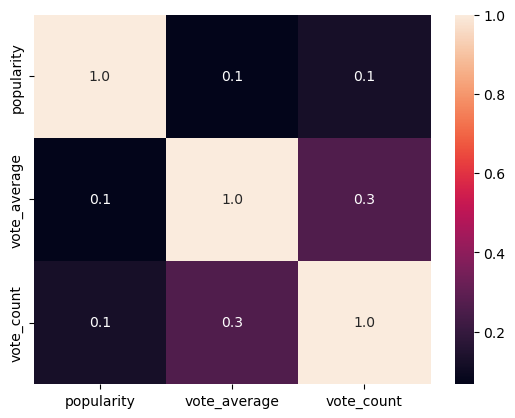

In [16]:
sns.heatmap(df1.corr(),annot=True, fmt="1.1f")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


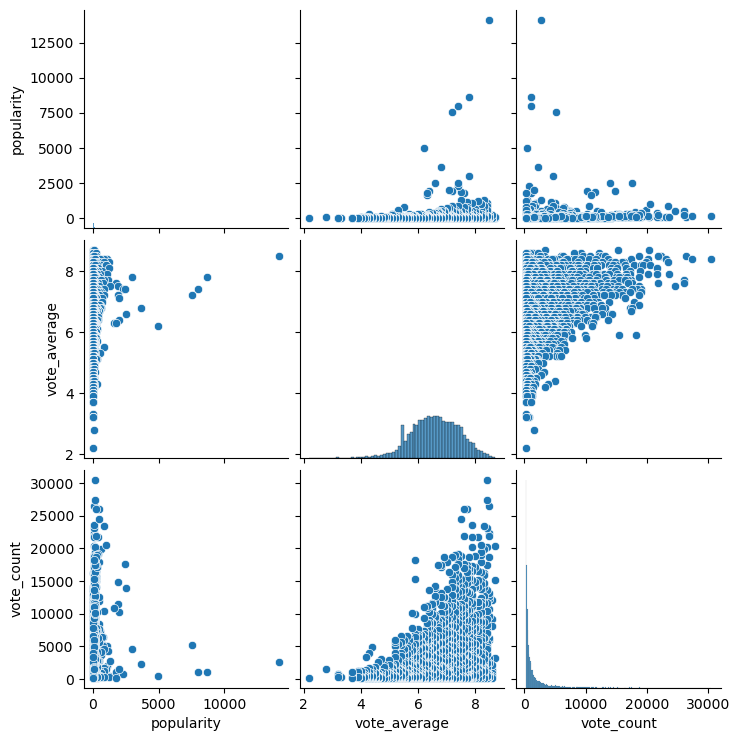

In [17]:
sns.pairplot(df1)

<Axes: xlabel='year'>

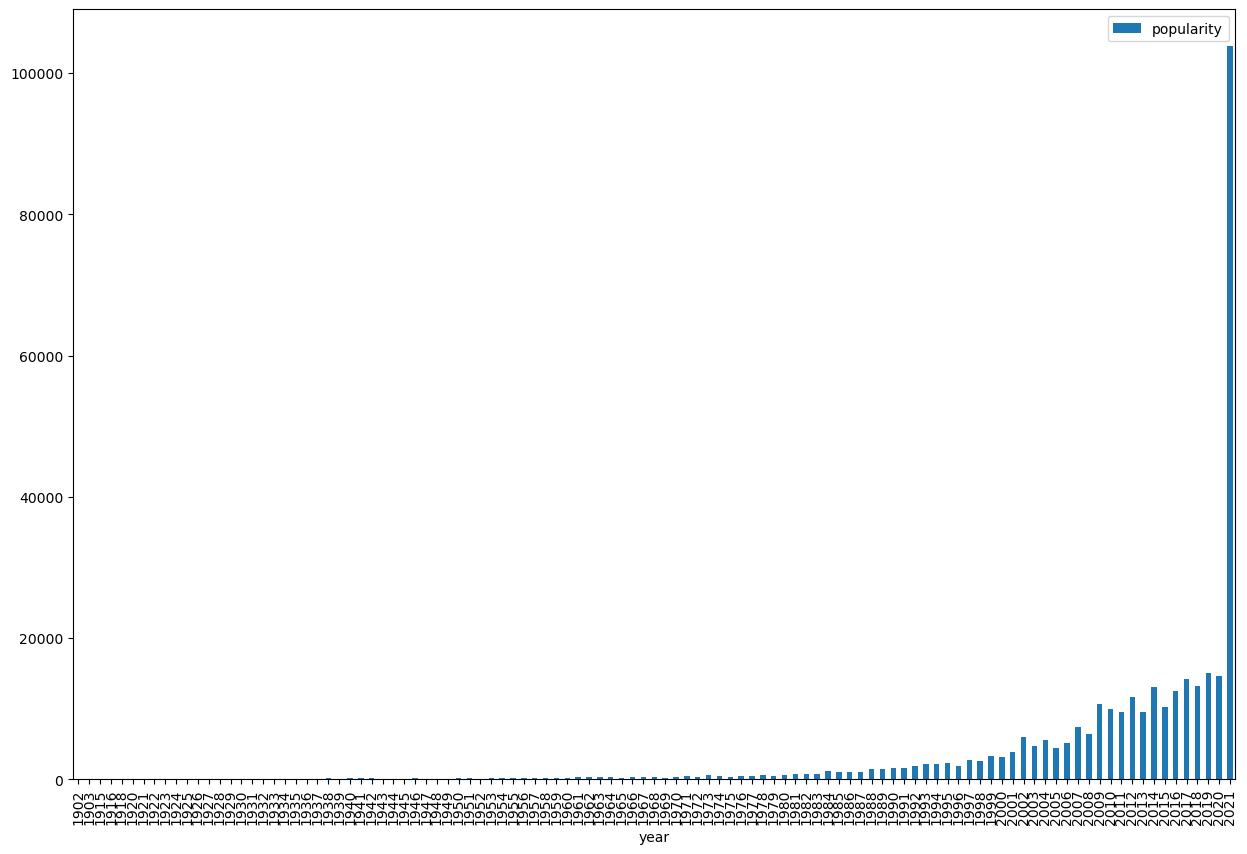

In [18]:
df_year=pd.DataFrame(df.groupby('year')['popularity'].sum())
df_year.plot.bar(figsize=(15,10))

<Axes: ylabel='title'>

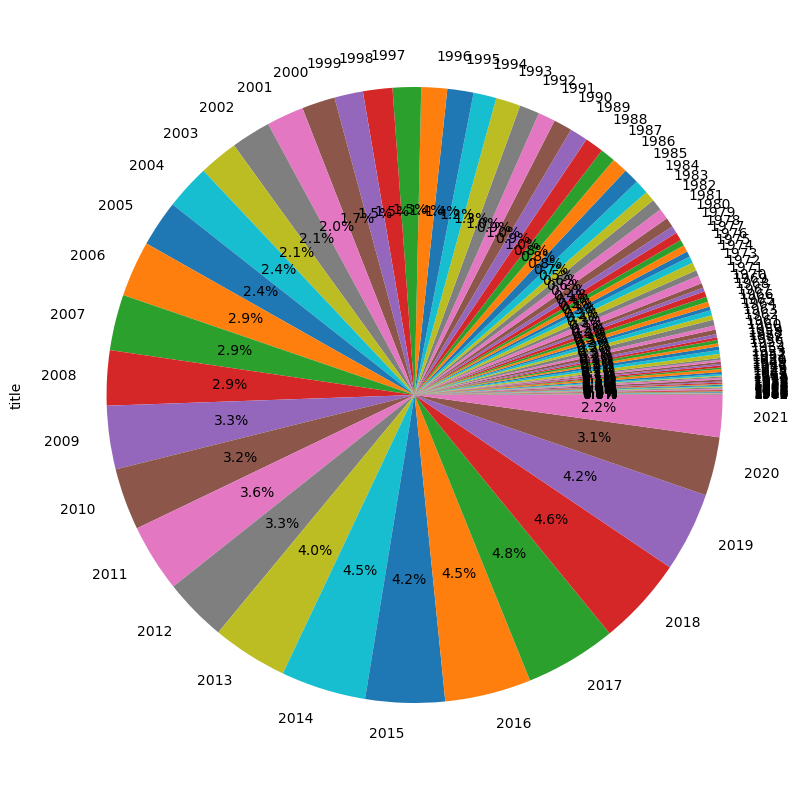

In [19]:
df.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<Axes: ylabel='title'>

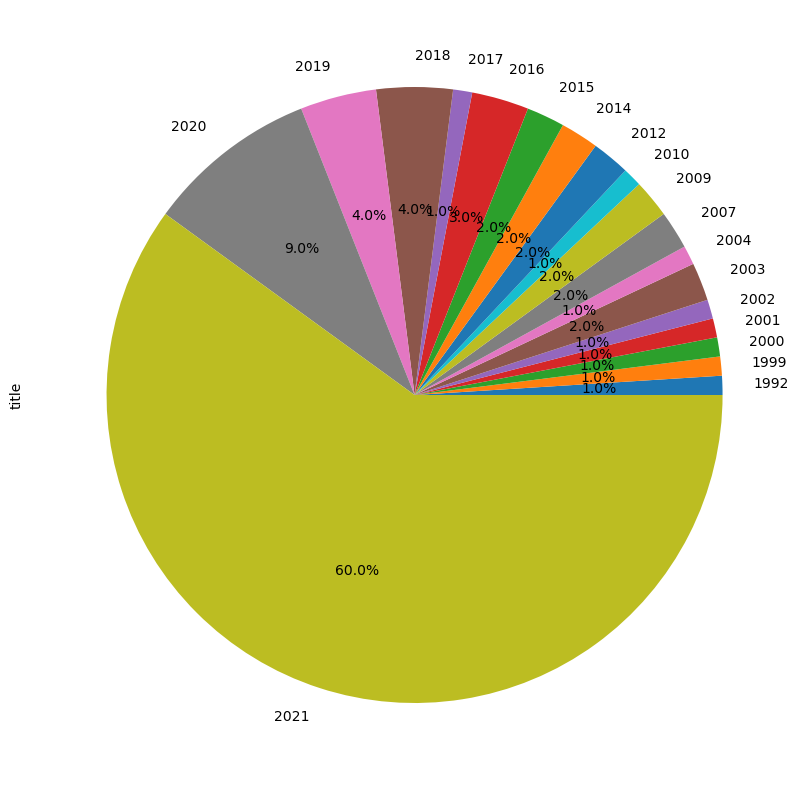

In [20]:
df_100.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")